In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
columns = ['Class','id','Sequence']
genes = pd.read_csv(url, names = columns)

In [150]:
genes.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [151]:
genes.isnull().sum()

Class       0
id          0
Sequence    0
dtype: int64

In [152]:
genes.describe()

,Class,id,Sequence
count,106,106,106
unique,2,106,106
top,-,1108,\t\tcatgaactcaaggctgatacggcgagacttgcgagccttgtc...
freq,53,1,1


In [153]:
genes.nunique()

Class         2
id          106
Sequence    106
dtype: int64

In [154]:
for i in range(len(genes)):
 genes['Sequence'][i] = genes['Sequence'][i].replace('\t', '')

In [155]:
genes.head()

,Class,id,Sequence
0,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,+,LEU1_TRNA,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...


In [156]:
nucleotide_sequence = pd.DataFrame(np.random.randn(106,57))

In [157]:
for i in range(genes.shape[0]):
 nucleotide_sequence.loc[i] = list(genes['Sequence'][i])

In [158]:
nucleotide_sequence['Class'] = genes['Class']

In [159]:
nucleotide_sequence.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


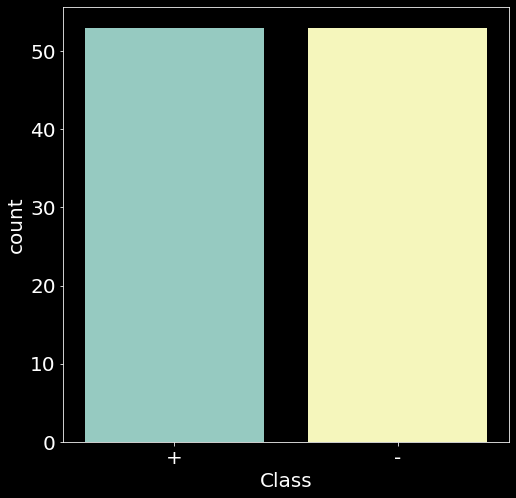

In [160]:
plt.figure(figsize=(8,8)) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.xlabel('Class',fontsize=20) 
plt.ylabel('count',fontsize=20) 
sns.countplot(nucleotide_sequence['Class'])

In [161]:
numerical_nucleotide = pd.get_dummies(nucleotide_sequence)
numerical_nucleotide.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [162]:
numerical_nucleotide.drop('Class_-',axis = 1,inplace = True)
numerical_nucleotide.rename(columns = {'Class_+':'Class'},inplace = True)

In [163]:
numerical_nucleotide.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X = numerical_nucleotide.drop('Class',axis = 1)
y = numerical_nucleotide['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [165]:
models = [KNeighborsClassifier(n_neighbors = 3),
          MLPClassifier(alpha = 1),
          DecisionTreeClassifier(max_depth = 5),
          RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
          AdaBoostClassifier(),
          GaussianNB(),
          SVC(kernel = 'linear'),
          SVC(kernel = 'rbf'),
          SVC(kernel = 'sigmoid')]


validation_type = model_selection.KFold(n_splits = 10)

cv_result = []
for i in range(len(models)):
  cv_result.append(model_selection.cross_val_score(models[i],X_train,y_train,cv = validation_type,scoring = 'accuracy').mean())

In [166]:
model_names = ['K Nearest Neighbors','Neural Net','Decision Tree','Random Forest','AdaBoost','Naive Bayes','SVM Linear','SVM rbf','SVM Sigmoid']

for i in range(len(models)):
  print('The cross validation score of {}: {}'.format(model_names[i],cv_result[i]))

The cross validation score of K Nearest Neighbors: 0.8214285714285714
The cross validation score of Neural Net: 0.9125
The cross validation score of Decision Tree: 0.85
The cross validation score of Random Forest: 0.6214285714285714
The cross validation score of AdaBoost: 0.8875
The cross validation score of Naive Bayes: 0.85
The cross validation score of SVM Linear: 0.925
The cross validation score of SVM rbf: 0.925
The cross validation score of SVM Sigmoid: 0.9125


In [167]:
accuracy = []
for i in range(len(models)):
 a = models[i].fit(X_train,y_train) 
 y_predict = a.predict(X_test)
 print(model_names[i]) 
 accuracy.append(accuracy_score(y_predict,y_test))
 print(classification_report(y_predict,y_test))
 print()

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.86      0.80      0.83        15

    accuracy                           0.81        27
   macro avg       0.81      0.82      0.81        27
weighted avg       0.82      0.81      0.82        27


Neural Net
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.86      0.92      0.89        13

    accuracy                           0.89        27
   macro avg       0.89      0.89      0.89        27
weighted avg       0.89      0.89      0.89        27


Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.57      0.73      0.64        11

    accuracy                           0.67        27
   macro avg       0.67      0.68      0.66        27
weighted avg       0.69    

In [168]:
df = pd.DataFrame([model_names, accuracy]).T
df.columns = ['Model', 'Accuracy']

In [169]:
df.sort_values(ascending=False, by='Accuracy')

,Model,Accuracy
7,SVM rbf,0.925926
8,SVM Sigmoid,0.925926
1,Neural Net,0.888889
6,SVM Linear,0.888889
0,K Nearest Neighbors,0.814815
4,AdaBoost,0.814815
5,Naive Bayes,0.814815
2,Decision Tree,0.666667
3,Random Forest,0.666667
